<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [13]:
from matplotlib import pyplot as plt

### 1.2 We need some data.

In [11]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
# u won't get an output just defining variables here


### 1.3 Here comes the comparison

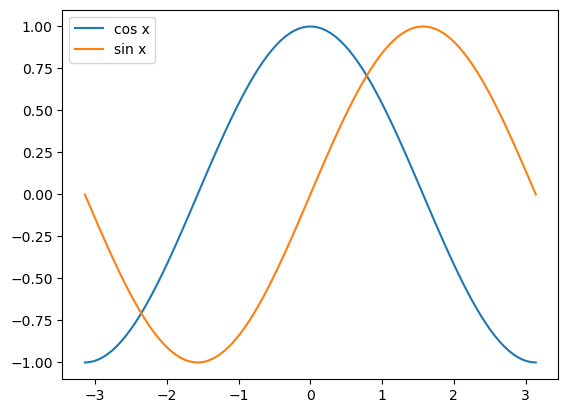

In [5]:
#pyplot interface
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()


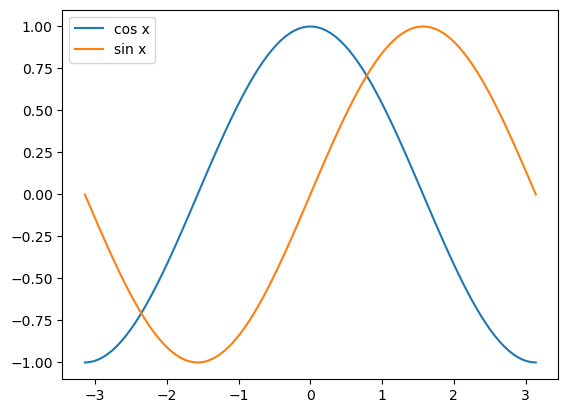

In [6]:
# OO interface
fig, ax = plt.subplots(nrows=1, ncols=1) # what subplot does is basically creating like a grid so that multiple plots can 
ax.plot(x, cos_x, label='cos x') # be plotted in the same figure. it takes (rows,columns,index) in the bracket. index is
ax.plot(x, sin_x, label='sin x') # to tell where the first plot should be plotted in the 'grid'
ax.legend() # ax.plot is similar to plt.plot but ax variable is a ref to an axes object. so ax.plot is adding plot to 
plt.show() # axes object

## 2 Using the OO Interface

### 2.1 Getting ax

In [20]:
%matplotlib inline

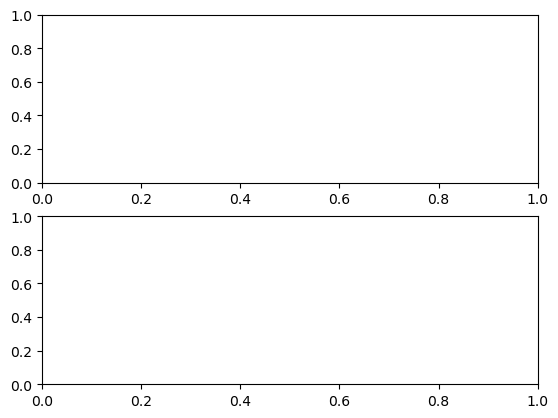

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=2) # u get 2 axes

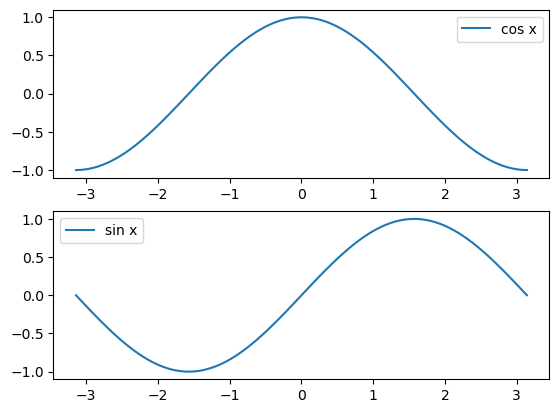

In [22]:
# ignore ig
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
fig, ax = plt.subplots(ncols=1, nrows=2)
ax[0].plot(x, cos_x, label='cos x') # ax is a 2D numpy array, so we access the subplots using square brackets, index it
ax[1].plot(x, sin_x, label='sin x')
ax[0].legend()
ax[1].legend()
plt.show()

### 2.2 What is ax

In [24]:
type(ax) # its a numpy array 


numpy.ndarray

In [25]:
ax.shape # its a 2d numpy array

(2,)

In [26]:
type(ax[0]) # matplotlib axes

matplotlib.axes._subplots.AxesSubplot

### 2.3 Plots in a column

In [27]:
ax[0].plot(x, cos_x, label='cos x') # first column 
ax[1].plot(x, sin_x, label='sin x') # second column, use indexing to identify cus its a 2d array 

### 2.4 Legends

In [28]:
ax[0].legend()
ax[1].legend() # same as plotting in prev
for a in ax: # rmbr ax is a 2d array
    a.legend()
    a.grid(alpha=.25) # adding grid to each axes


### 2.5 Tweaks

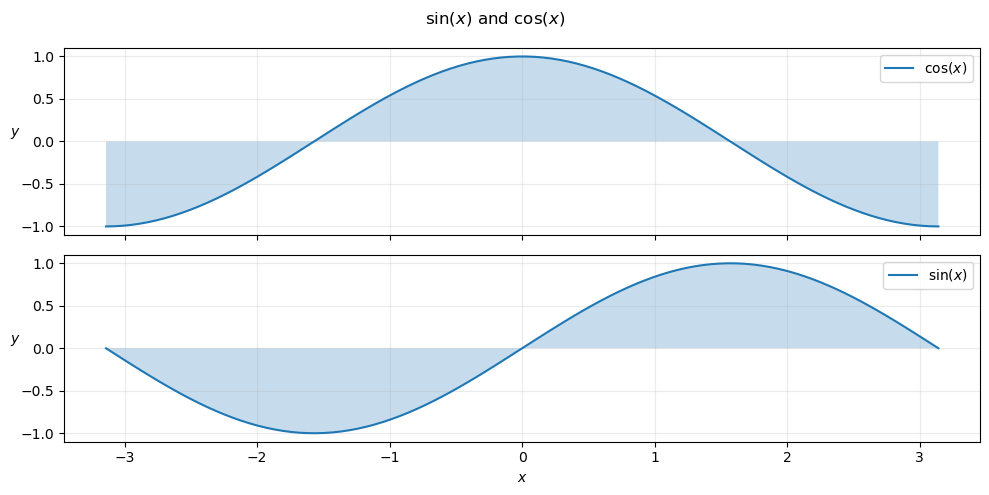

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(10, 5),   # 10 x 5 inches but idk why its reading from right to left 
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0) # rotation sets angle of label so setting it to 0 means that it is horizontal

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.show()

## 3 More rows and columns

### 3.1 Using ax

In [36]:
ax[0, 0].plot(x1, np.ones_like(x1)) #np.ones_like() returns an array of ones with the same shape 
ax[0, 1].plot(x2, 2*np.ones_like(x2)) # and type as the input array
ax[1, 0].plot(x1, 3*np.ones_like(x1)) # there is an error because here ax is 1d array of length 4 instead of 2x2
ax[1, 1].plot(x2, 4**np.ones_like(x2)) 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [39]:
print(ax.shape) #only 2 rows ig

(2,)


### 3.2 Sharing axes

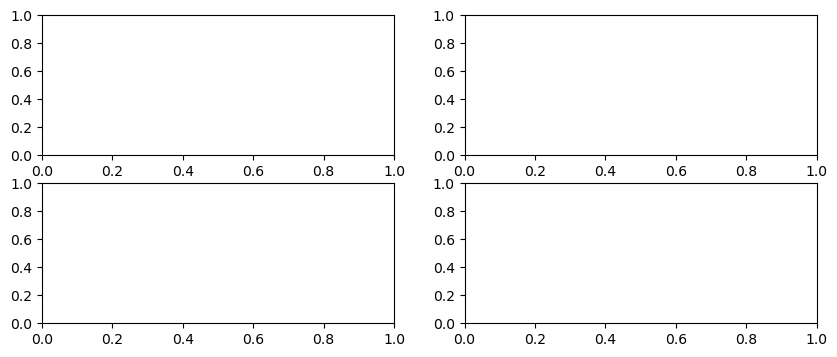

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2, # NO sharing
                       figsize=(10, 4))


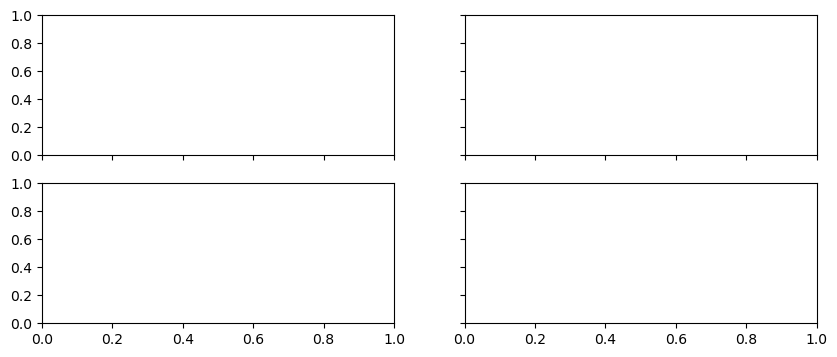

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4), # no axes for the top row 
                       sharex=True, sharey='row')

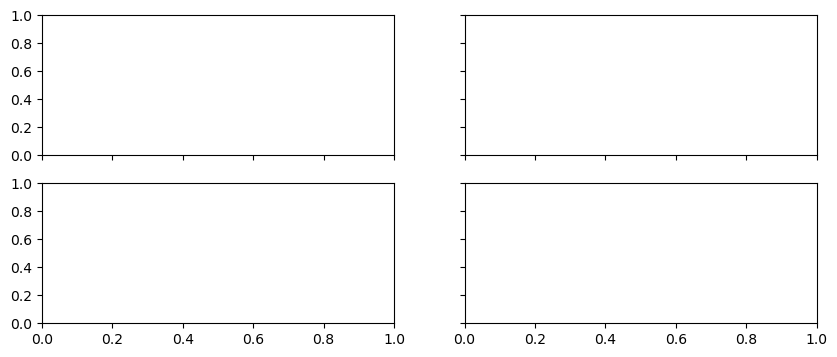

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex=True, sharey='all') # all subplots in a row will share the same y-axis range 

### 3.3 Accessing all axes

In [45]:
for a in ax.flatten(): # flatten into 1D list
    a.grid(alpha=.25)

## 4 Other useful plots

### 4.1 Histograms

In [48]:
data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data['All'] = np.loadtxt(filename, skiprows=1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data['NUS'] = np.loadtxt(filename, skiprows=1)

plt.style.use('bmh')

plt.hist([data['All'], data['NUS']],
         bins=50,                        # How many bins to split the data
         label=['All', 'NUS']
         )
plt.xlabel('Mean of Basic Montly Eraning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

FileNotFoundError: sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv not found.

### 4.2 Scatter plots

In [ ]:

# Your code here


### 4.3 Bar charts

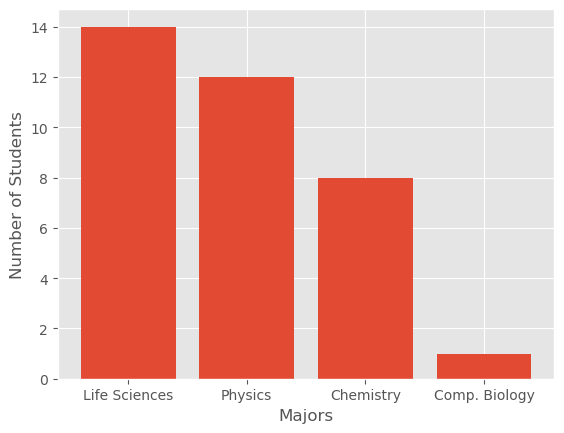

In [49]:
student_numbers = {'Life Sciences': 14, # use a dictionary
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()


### 4.4 Pie charts

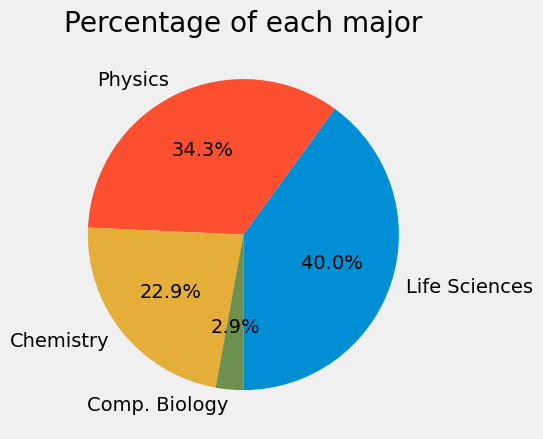

In [50]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
plt.show()

## Exercise 1 :  Plotting data from files

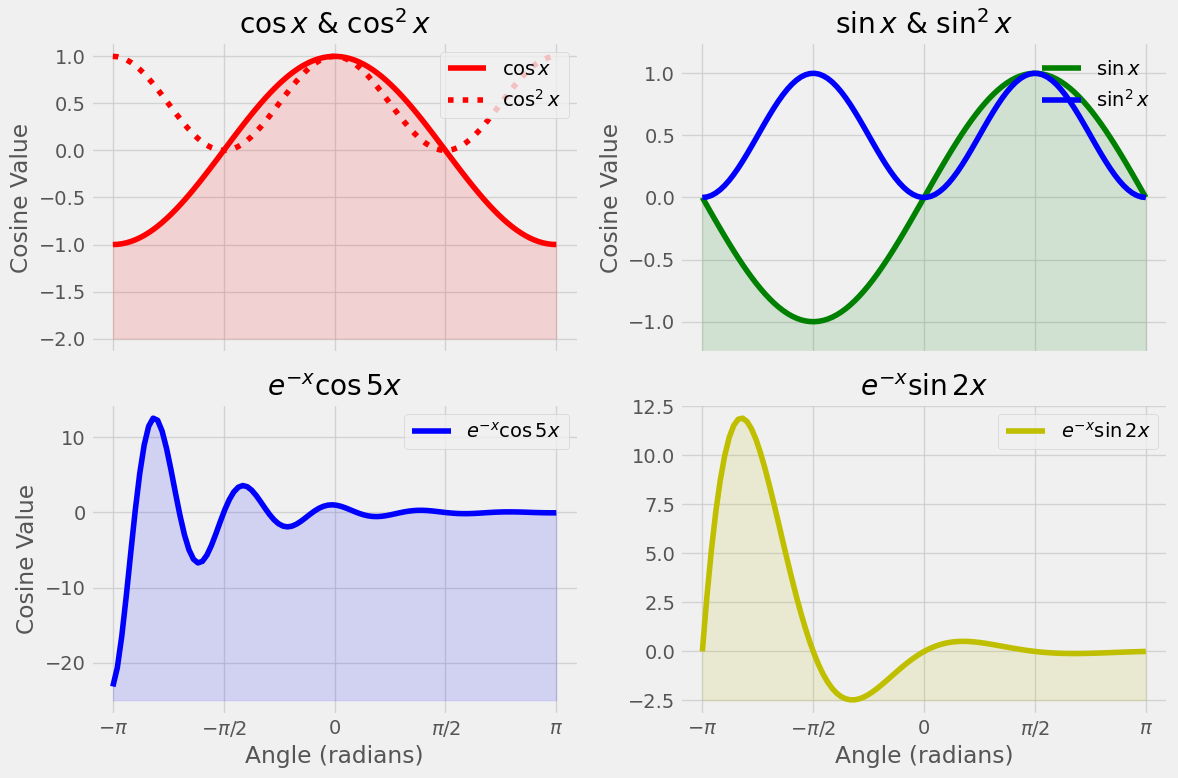

In [109]:
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8), sharex='col')


#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$')
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].fill_between(x, cos_x, -2, color='red', alpha=.125)
axes[0, 0].legend(loc='upper right')


#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='green', label='$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='green', alpha=.125)
axes[0, 1].plot(x, sin_x**2, color = 'blue', label='$\sin^2 x$')
axes[0, 1].set_ylabel('Cosine Value')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].legend(loc='upper right', frameon=False)
axes[0, 1].set_title('$\sin x$ & $\sin^2x$')



#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$e^{-x}\cos 5x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend(loc='upper right')

#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label='$e^{-x}\sin 2x$')
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].fill_between(x, fun2_x, -2.5, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_xlabel('Angle (radians)')


# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.8)


plt.tight_layout() # neatens everything up 
plt.show()